In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyearth import Earth
import empyrical
%matplotlib inline

In [2]:
fname = './data/scenario.xlsx'
sfname = './data/stock.xlsx'

In [3]:
df = pd.read_excel(sfname, index_col=0)

In [4]:
stock = df['000001.SH']

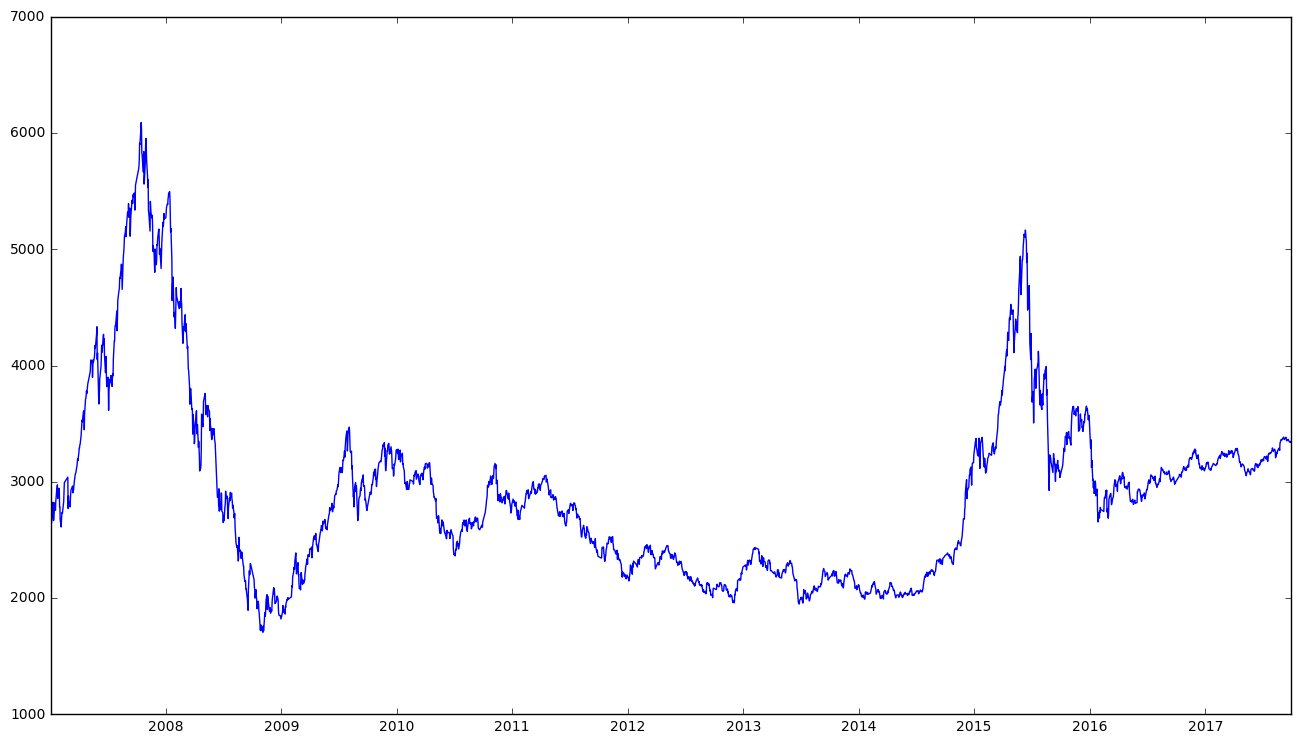

In [5]:
plt.figure(figsize=(16, 9))
plt.plot(stock)

In [6]:
stock_q = stock.resample('Q').last()

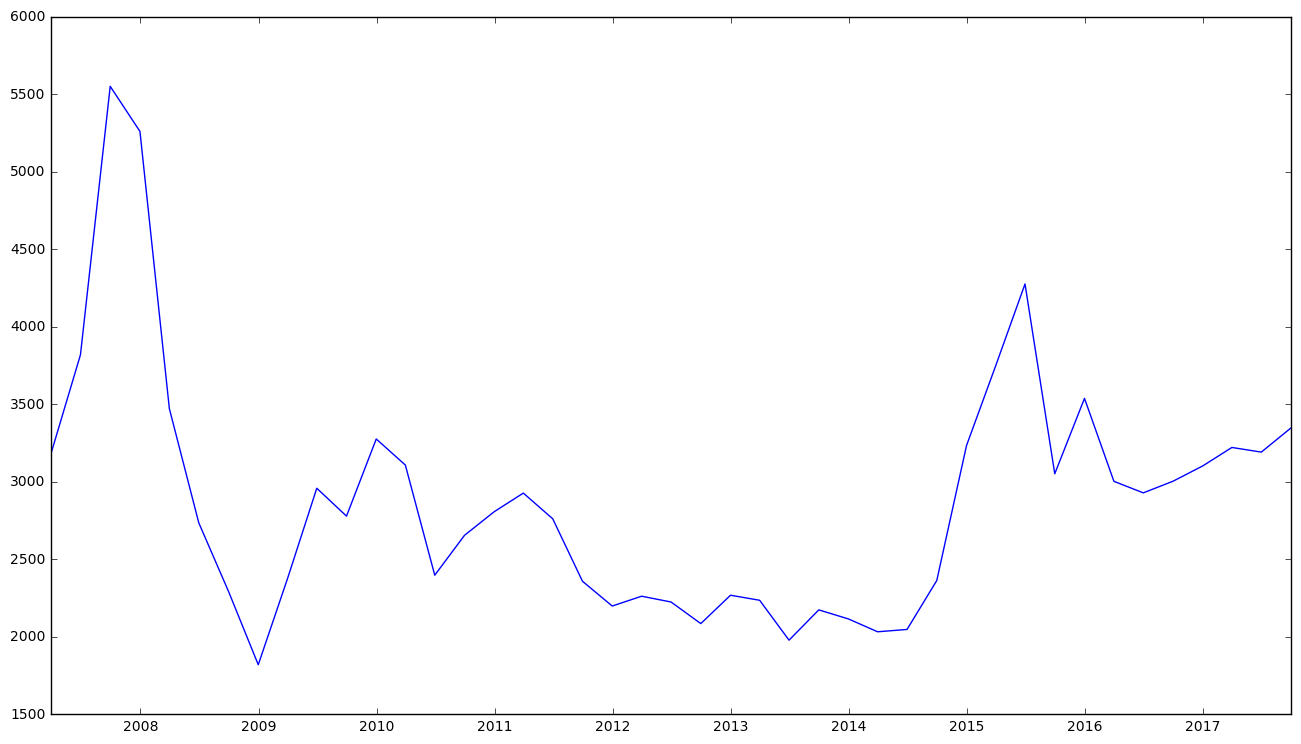

In [7]:
plt.figure(figsize=(16, 9))
plt.plot(stock_q)

In [8]:
df = pd.read_excel(fname, index_col=0, sheetname='GDP')

In [9]:
gdp = df['GDP']

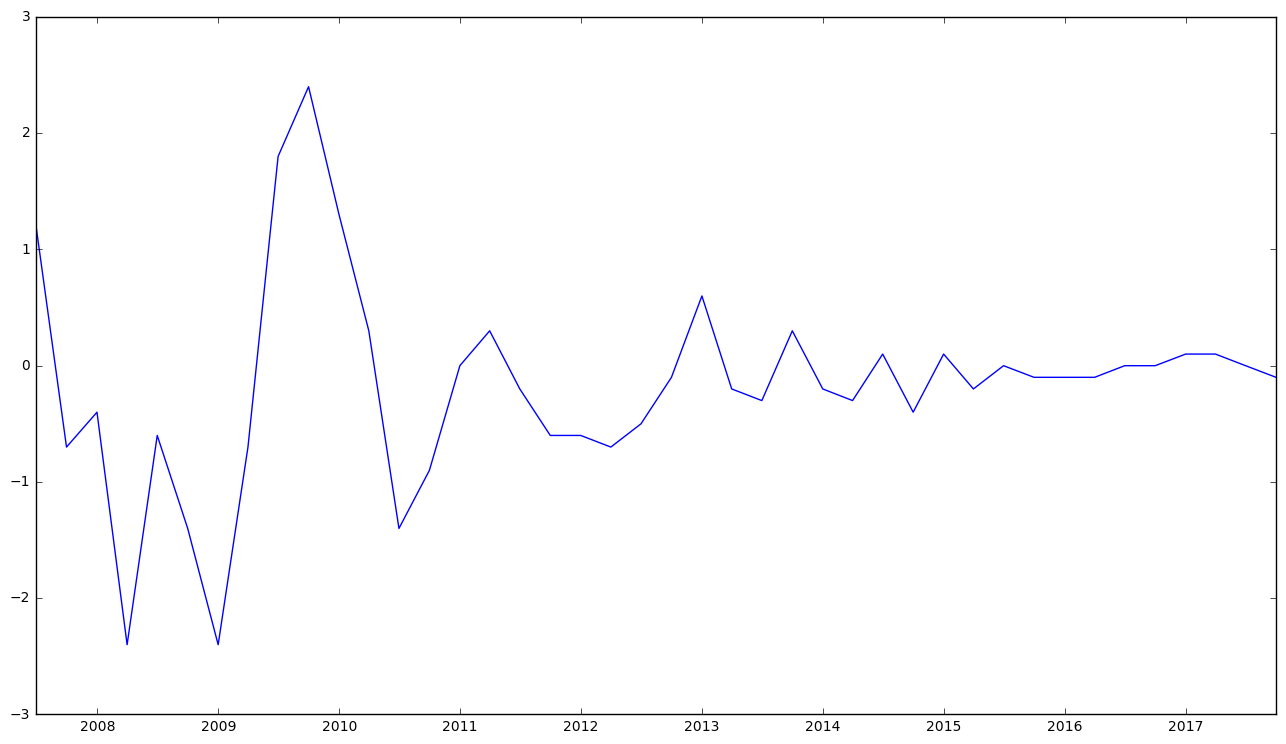

In [10]:
plt.figure(figsize=(16, 9))
plt.plot(gdp.diff())

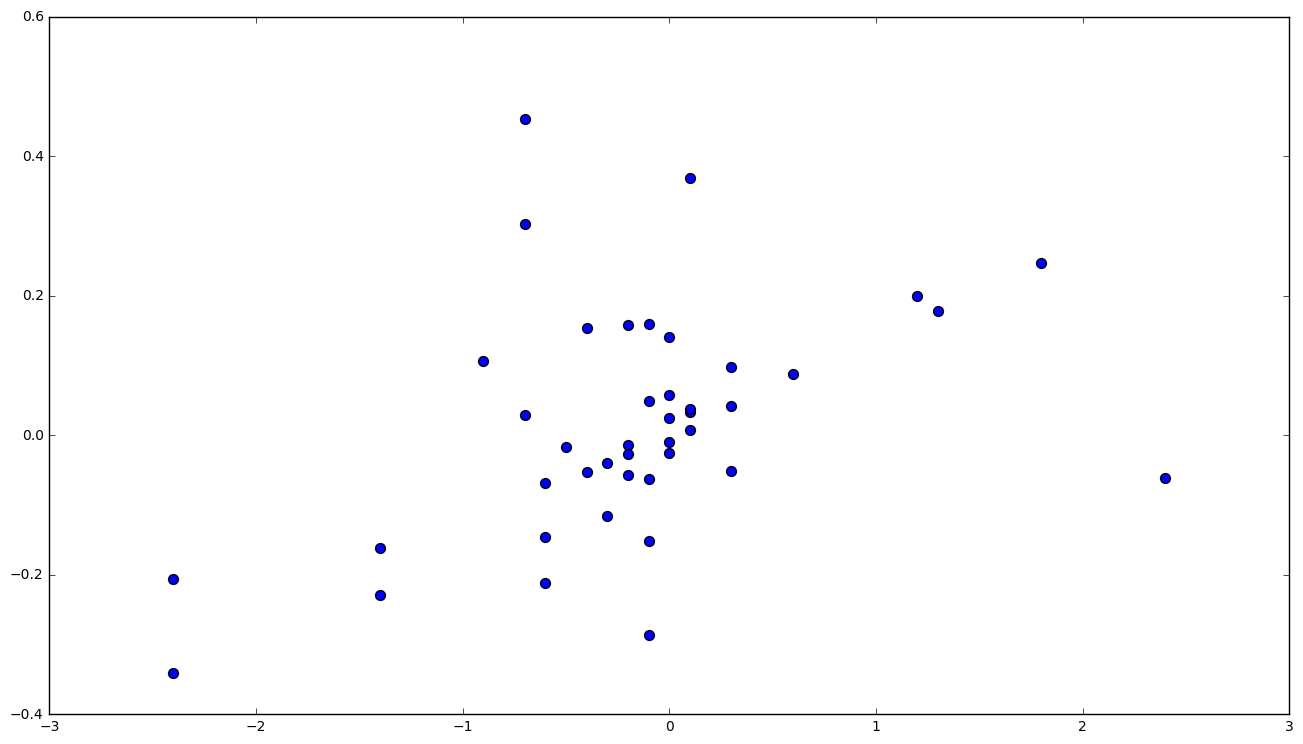

In [18]:
plt.figure(figsize=(16, 9))
plt.scatter(gdp.diff(), stock_q.pct_change(), s=50)

In [19]:
X = np.column_stack([gdp.diff().dropna().values])
y = stock_q.pct_change().dropna().values

In [20]:
X.shape, y.shape

((42, 1), (42,))

In [21]:
model = Earth()
model.fit(X,y)

Earth(allow_linear=None, allow_missing=False, check_every=None,
   enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
   fast_h=None, feature_importance_type=None, max_degree=None,
   max_terms=None, min_search_points=None, minspan=None,
   minspan_alpha=None, penalty=None, smooth=None, thresh=None,
   use_fast=None, verbose=0, zero_tol=None)

In [24]:
print(model.summary())

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      0.0855382    
x0              Yes     None         
h(x0-0.3)       Yes     None         
h(0.3-x0)       No      -0.117393    
h(x0-0)         Yes     None         
h(0-x0)         Yes     None         
h(x0-0)         Yes     None         
h(0-x0)         Yes     None         
-------------------------------------
MSE: 0.0216, GCV: 0.0257, RSQ: 0.2014, GRSQ: 0.0943


In [25]:
y_hat = model.predict(X)

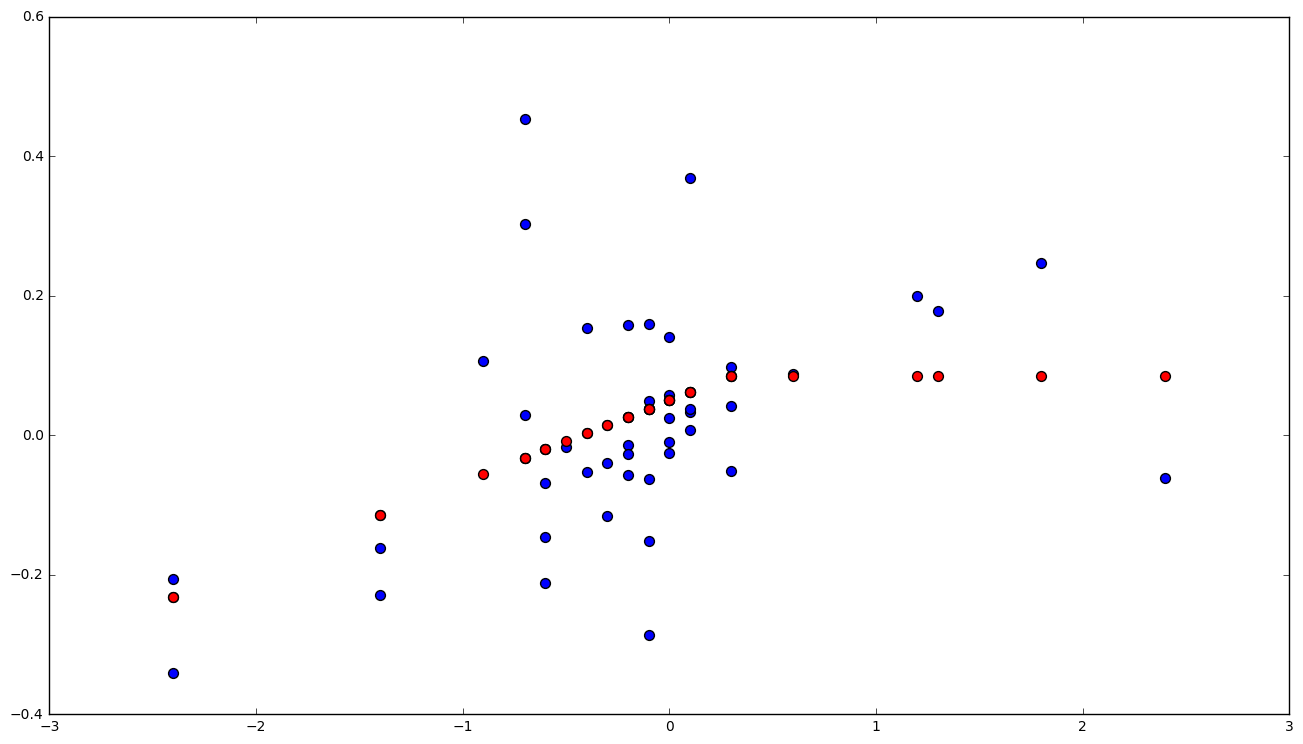

In [39]:
plt.figure(figsize=(16, 9))
plt.scatter(gdp.diff(), stock_q.pct_change(), s=50)
plt.scatter(X[:, 0], y_hat, s=50, c='red')

In [40]:
df = pd.read_excel(fname, index_col=0, sheetname='inflation')

In [41]:
cpi = df['CPI']

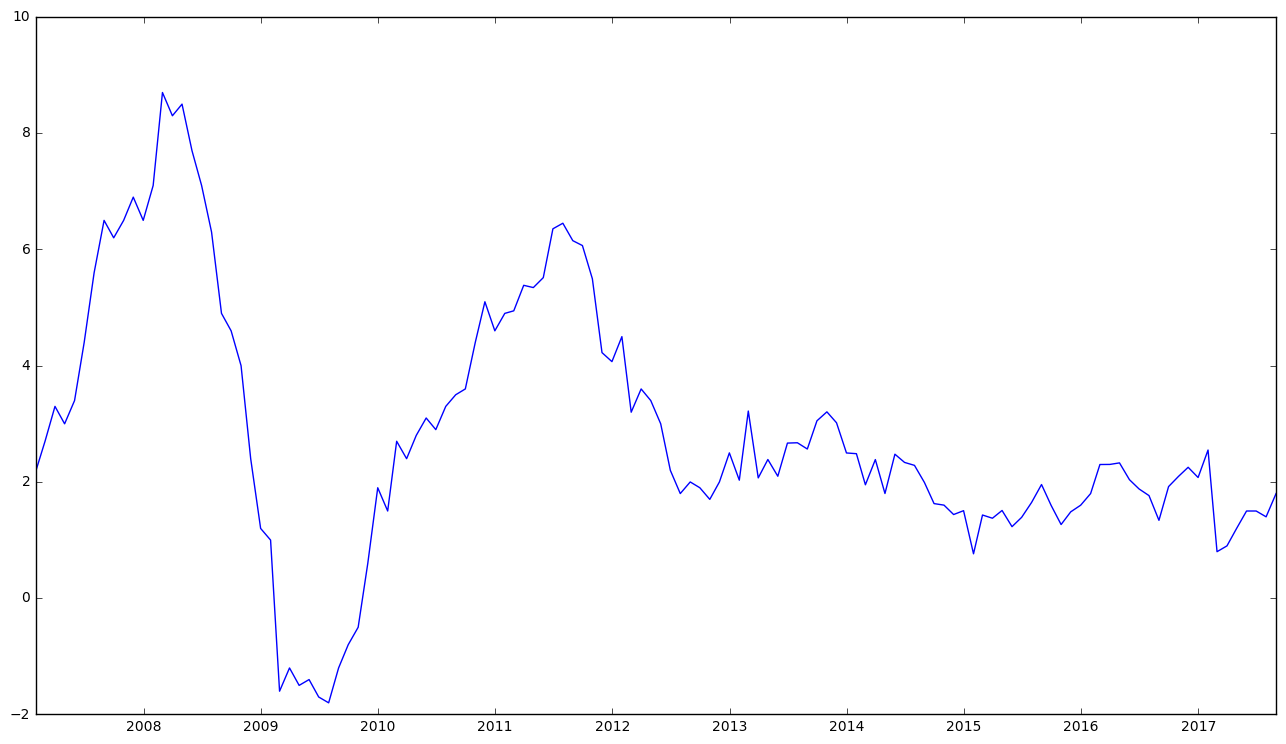

In [42]:
plt.figure(figsize=(16, 9))
plt.plot(cpi)

In [44]:
df = pd.read_excel(sfname, index_col=0)

In [46]:
stock_m = stock.resample('M').last()

In [47]:
stock_m = stock_m[stock_m.index <= cpi.index[-1]]

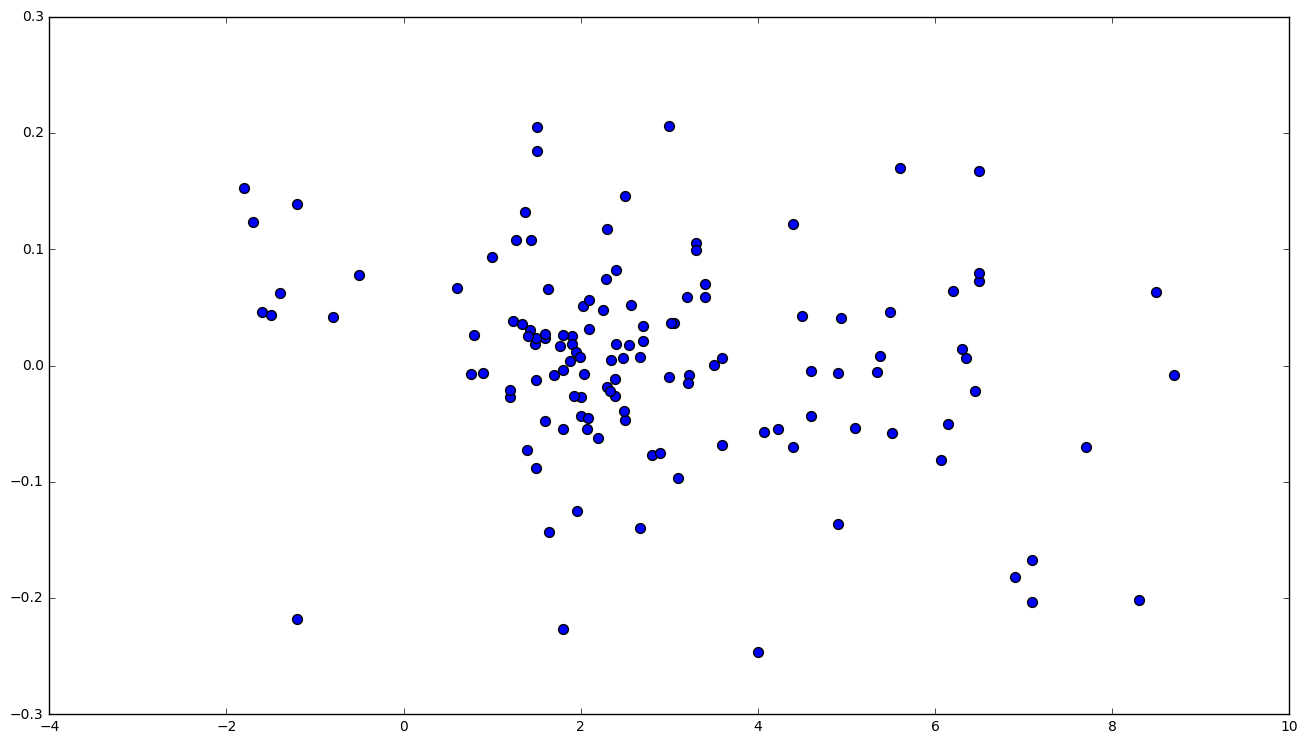

In [67]:
plt.figure(figsize=(16, 9))
plt.scatter(cpi, stock_m.pct_change(), s=50)

In [61]:
X = np.column_stack([cpi.values[1:]])
y = stock_m.pct_change().dropna().values

In [62]:
model = Earth()
model.fit(X,y)

Earth(allow_linear=None, allow_missing=False, check_every=None,
   enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
   fast_h=None, feature_importance_type=None, max_degree=None,
   max_terms=None, min_search_points=None, minspan=None,
   minspan_alpha=None, penalty=None, smooth=None, thresh=None,
   use_fast=None, verbose=0, zero_tol=None)

In [63]:
print(model.summary())

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      0.0208209    
x0              Yes     None         
h(x0-6.5)       Yes     None         
h(6.5-x0)       Yes     None         
h(x0-1.9)       Yes     None         
h(1.9-x0)       Yes     None         
h(x0-1.5)       No      -0.00977495  
h(1.5-x0)       Yes     None         
h(x0-2.0981)    Yes     None         
h(2.0981-x0)    Yes     None         
h(x0-1.6011)    Yes     None         
h(1.6011-x0)    Yes     None         
h(x0-1.2)       Yes     None         
h(1.2-x0)       Yes     None         
h(x0-2.30139)   Yes     None         
h(2.30139-x0)   Yes     None         
-------------------------------------
MSE: 0.0070, GCV: 0.0074, RSQ: 0.0445, GRSQ: 0.0055


In [64]:
y_hat = model.predict(X)

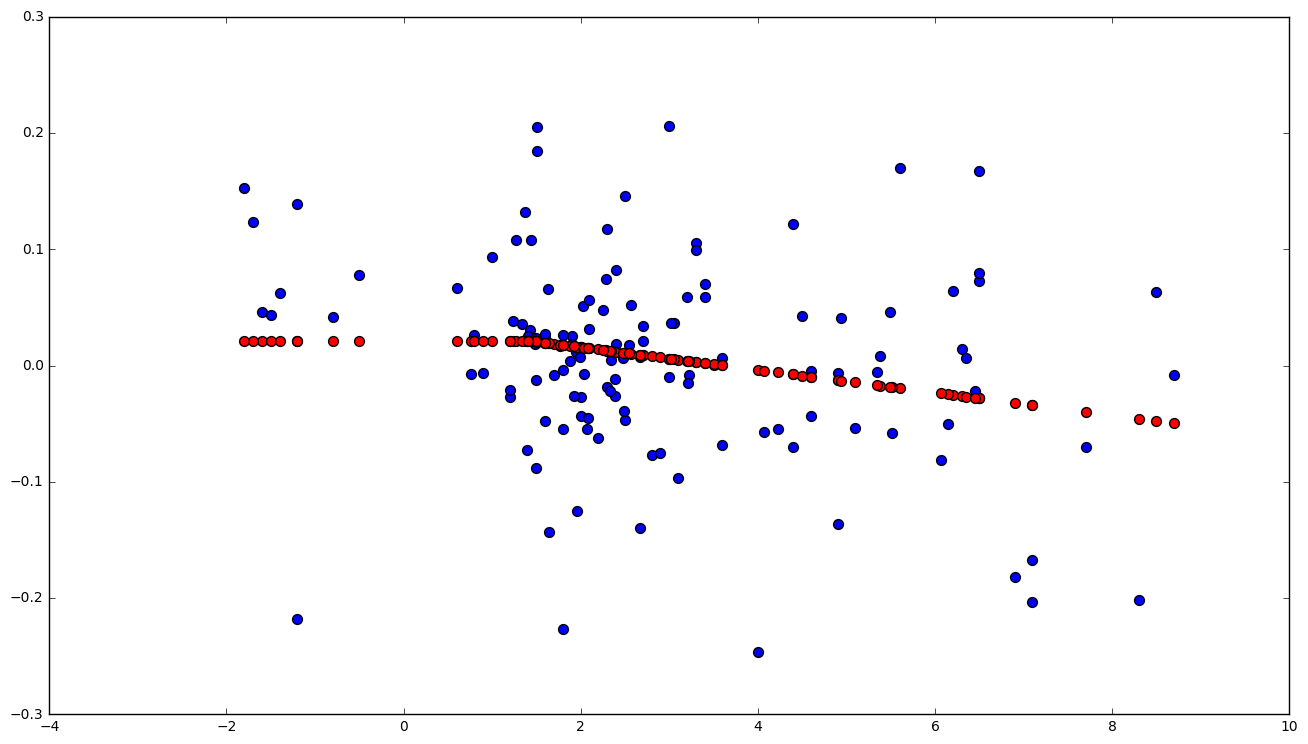

In [66]:
plt.figure(figsize=(16, 9))
plt.scatter(cpi, stock_m.pct_change(), s=50)
plt.scatter(X[:, 0], y_hat, s=50, c='red')

In [68]:
df = pd.read_excel('./data/sp500.xlsx', index_col=0)

In [69]:
stock = df['S&P500']

In [70]:
df = pd.read_excel('./data/us.xlsx', index_col=0, sheetname='GDP')

In [71]:
gdp = df['GDP']

In [72]:
stock = stock[(stock.index >= '1948-01-01') & (stock.index <= gdp.index[-1])]

In [73]:
stock = stock.resample('Q').last()
# stock = stock.pct_change().resample('Q').apply(lambda x: empyrical.annual_return(x))

In [74]:
stock.shape, gdp.shape

((279,), (279,))

In [75]:
# stock = stock[stock.index >= '1964-01-01']
# gdp = gdp[gdp.index >= '1964-01-01']

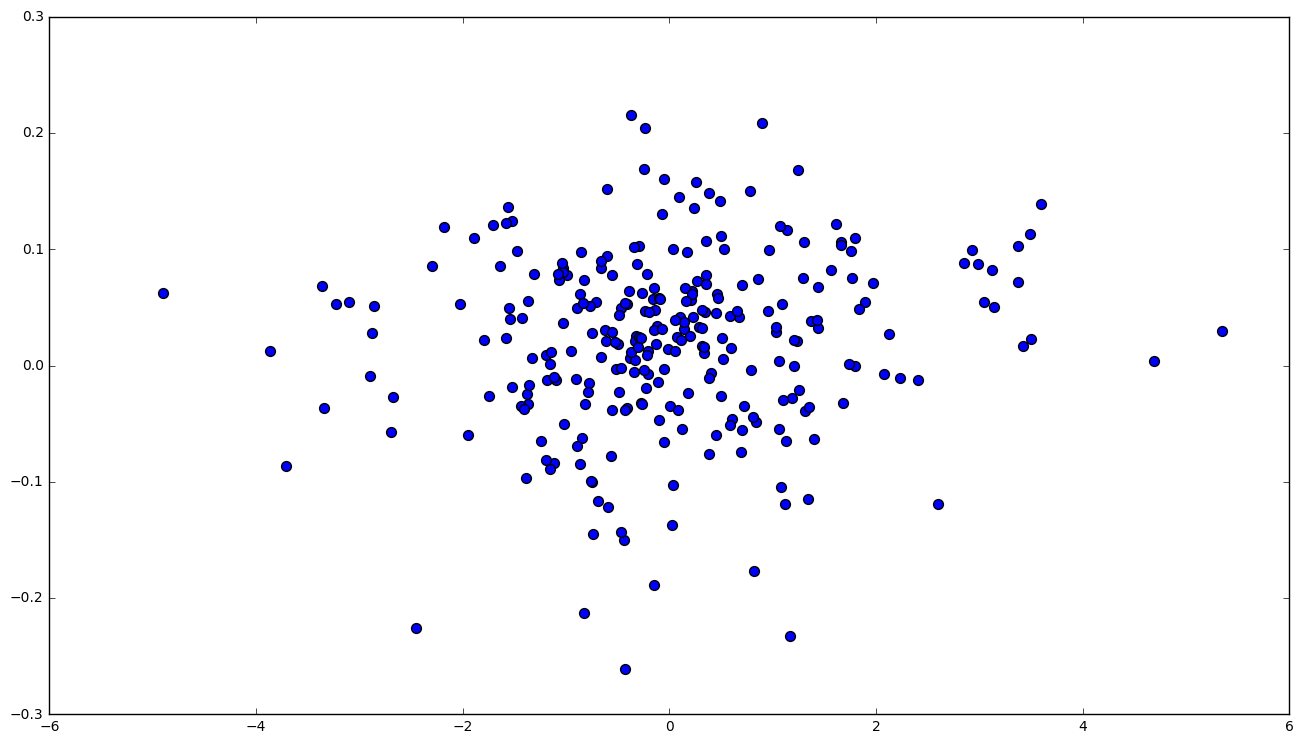

In [77]:
plt.figure(figsize=(16, 9))
plt.scatter(gdp.diff(), stock.pct_change(), s=50)

In [96]:
df = pd.read_excel('./data/sp500.xlsx', index_col=0)

In [97]:
stock = df['S&P500']

In [98]:
df = pd.read_excel('./data/us.xlsx', index_col=0, sheetname='inflation')

In [99]:
cpi = df['CPI']

In [100]:
cpi = cpi.resample('Q').last()

In [101]:
stock = stock[(stock.index >= '1948-01-01') & (stock.index <= cpi.index[-1])]

In [102]:
stock = stock.resample('Q').last()

In [103]:
cpi.shape, stock.shape

((279,), (279,))

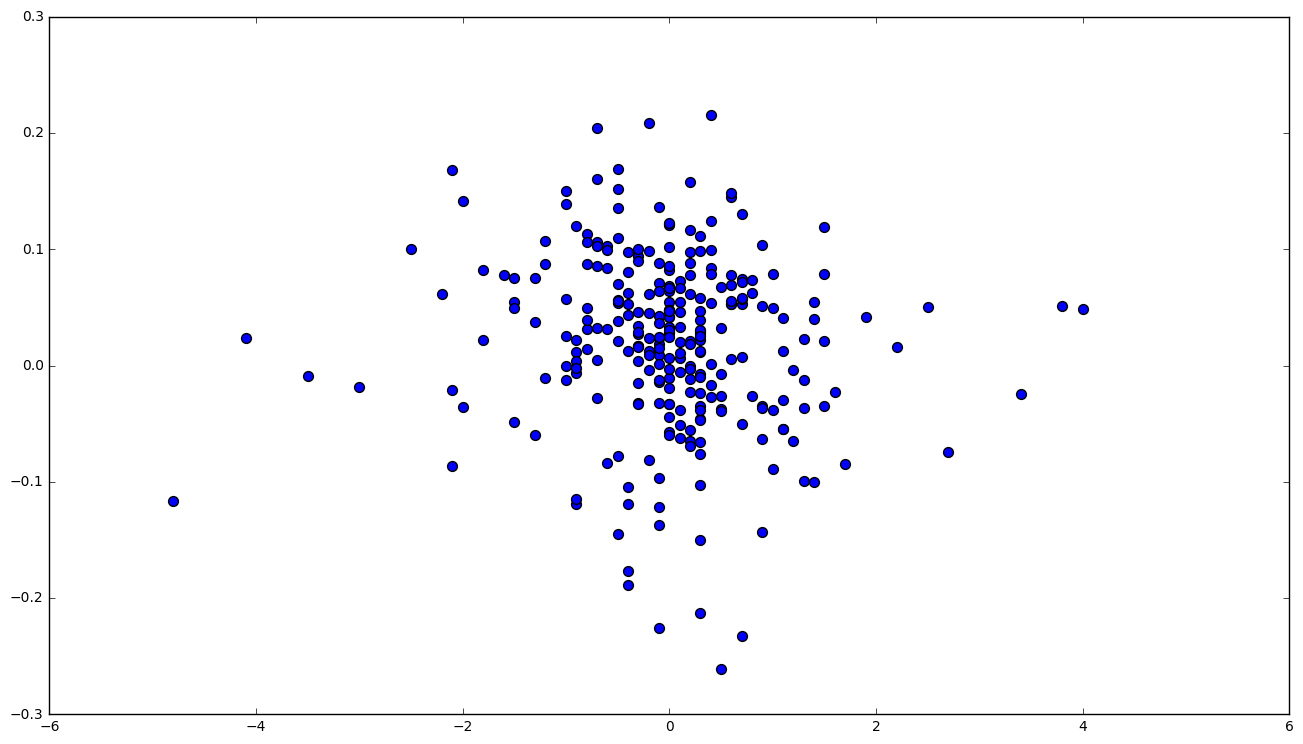

In [105]:
plt.figure(figsize=(16, 9))
plt.scatter(cpi.diff(), stock.pct_change(), s=50)

In [92]:
X = np.column_stack([cpi.diff().dropna().values])
y = stock.pct_change().dropna().values

In [93]:
model = Earth()
model.fit(X,y)

Earth(allow_linear=None, allow_missing=False, check_every=None,
   enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
   fast_h=None, feature_importance_type=None, max_degree=None,
   max_terms=None, min_search_points=None, minspan=None,
   minspan_alpha=None, penalty=None, smooth=None, thresh=None,
   use_fast=None, verbose=0, zero_tol=None)

In [94]:
print(model.summary())

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      0.0899062    
x0              Yes     None         
h(x0+1.3)       Yes     None         
h(-1.3-x0)      Yes     None         
h(x0-2.3)       Yes     None         
h(2.3-x0)       Yes     None         
h(x0+2.3)       Yes     None         
h(-2.3-x0)      Yes     None         
h(x0-0.1)       Yes     None         
h(0.1-x0)       Yes     None         
-------------------------------------
MSE: 0.0262, GCV: 0.0270, RSQ: 0.0000, GRSQ: 0.0000
